### Notebook for the cell proportion analysis of Healthy_vs_COPD CTRL_vs_IAV data

- **Developed by**: Carlos Talavera-López Ph.D
- **Würzburg Institute for Systems Immunology - Faculty of Medicine - Julius Maximilian Universität Würzburg**
- **Created on**: 231204
- **Last modified**: 231204

### Load required packages

In [1]:
import milopy
import numpy as np
import pandas as pd
import scanpy as sc
import milopy.core as milo
import matplotlib.pyplot as plt

### Set up working environment

In [2]:
sc.settings.verbosity = 3
sc.logging.print_versions()
sc.settings.set_figure_params(dpi = 180, color_map = 'magma_r', dpi_save = 300, vector_friendly = True, format = 'svg')

-----
anndata     0.10.3
scanpy      1.9.6
-----
PIL                 10.1.0
appnope             0.1.3
asttokens           NA
cffi                1.16.0
comm                0.2.0
cycler              0.12.1
cython_runtime      NA
dateutil            2.8.2
debugpy             1.8.0
decorator           5.1.1
exceptiongroup      1.2.0
executing           2.0.1
get_annotations     NA
h5py                3.10.0
importlib_resources NA
ipykernel           6.27.1
ipywidgets          8.1.1
jedi                0.19.1
jinja2              3.1.2
joblib              1.3.2
kiwisolver          1.4.5
llvmlite            0.41.1
markupsafe          2.1.3
matplotlib          3.8.2
milopy              0.1.1
mpl_toolkits        NA
natsort             8.4.0
numba               0.58.1
numpy               1.26.2
packaging           23.2
pandas              2.1.3
parso               0.8.3
patsy               0.5.4
pexpect             4.9.0
platformdirs        4.0.0
prompt_toolkit      3.0.41
psutil              5

### Load working object

In [3]:
adata = sc.read_h5ad('../../../data/Marburg_cell_states_locked_scANVI_ctl230901.raw.h5ad')
adata

AnnData object with n_obs × n_vars = 97573 × 27208
    obs: 'sex', 'age', 'ethnicity', 'PaCO2', 'donor', 'infection', 'disease', 'SMK', 'illumina_stimunr', 'bd_rhapsody', 'n_genes', 'doublet_scores', 'predicted_doublets', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'n_counts', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', 'condition', 'sample_group', 'IAV_score', 'group', 'Viral_score', 'cell_type', 'cell_states', 'leiden', 'cell_compartment', 'seed_labels', '_scvi_batch', '_scvi_labels', 'C_scANVI'
    var: 'mt', 'ribo'
    obsm: 'X_scANVI', 'X_scVI', 'X_umap'

### Test for differential abundance with `milo`

In [4]:
sc.pp.neighbors(adata, n_neighbors = 50, n_pcs = 50, random_state = 1712)

computing neighbors
         Falling back to preprocessing with `sc.pp.pca` and default params.
computing PCA
    with n_comps=50


/Users/cartalop/mambaforge/envs/milopy/lib/python3.9/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


    finished (0:01:40)


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:02:03)


In [5]:
milo.make_nhoods(adata)
milo.count_nhoods(adata, sample_col = "batch")
milo.DA_nhoods(adata, design = "~ group")

/Users/cartalop/mambaforge/envs/milopy/lib/python3.9/site-packages/milopy/core.py:130: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 815.43414307  758.85723877 1143.66650391 ...  950.54760742  425.32983398
  479.59371948]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  adata.obs.loc[adata.obs["nhood_ixs_refined"]
/Users/cartalop/mambaforge/envs/milopy/lib/python3.9/site-packages/milopy/core.py:239: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if design_df.dtypes[i].name == 'category':
/Users/cartalop/mambaforge/envs/milopy/lib/python3.9/site-packages/milopy/core.py:311: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will alw

In [6]:
milo_results = adata.uns["nhood_adata"].obs
milo_results

,index_cell,kth_distance,logFC,logCPM,F,PValue,FDR,SpatialFDR
0,184052-ST07_CSE_CTRL-V1,815.434143,-1.054178,7.877668,0.320187,0.573307,0.892996,0.950354
1,5902943-CSE_06_CRTL-V2,758.857239,-2.454542,7.183560,2.803925,0.098387,0.569965,0.796819
2,6951180-CSE_06_CRTL-V2,1143.666504,-1.706770,7.220578,1.475208,0.228500,0.736290,0.879227
3,9148493-CSE_06_CRTL-V2,1536.885132,-4.404835,7.086147,7.018557,0.009966,0.150228,0.313564
4,8262614-CSE_06_CRTL-V2,828.427490,-1.923746,7.544981,1.814605,0.182188,0.695704,0.860893
...,...,...,...,...,...,...,...,...
7258,4141917-CSE03_IAV-V6,395.715942,-0.878139,7.066445,0.406271,0.525893,0.878310,0.945812
7259,12564564-CSE03_IAV-V6,316.638672,-0.109738,7.654589,0.005386,0.941706,0.990632,0.995939
7260,10943694-CSE03_IAV-V6,950.547607,4.382656,7.541639,7.807515,0.006665,0.118362,0.262370
7261,10180664-CSE03_IAV-V6,425.329834,1.522426,7.342543,1.041251,0.311049,0.786027,0.897710


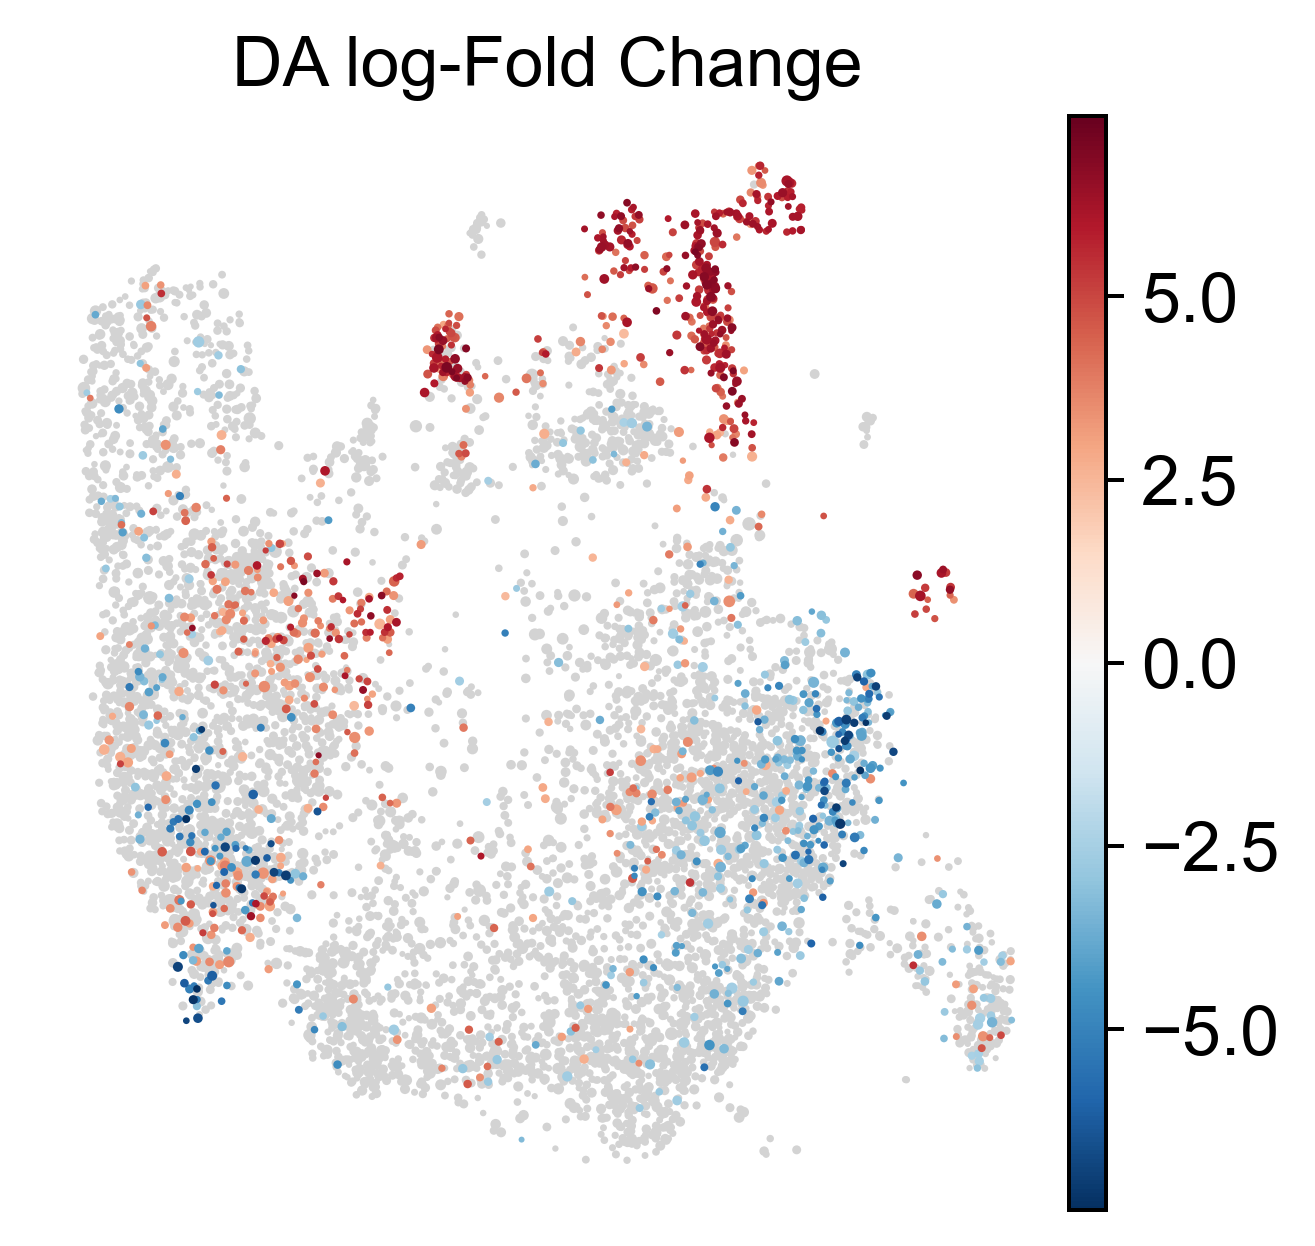

In [7]:
milopy.utils.build_nhood_graph(adata)
milopy.plot.plot_nhood_graph(adata, alpha = 0.8, min_size = 0.1)

In [8]:
milopy.utils.annotate_nhoods(adata, anno_col = 'cell_type')

Text(0.5, 0, 'celltype fraction')

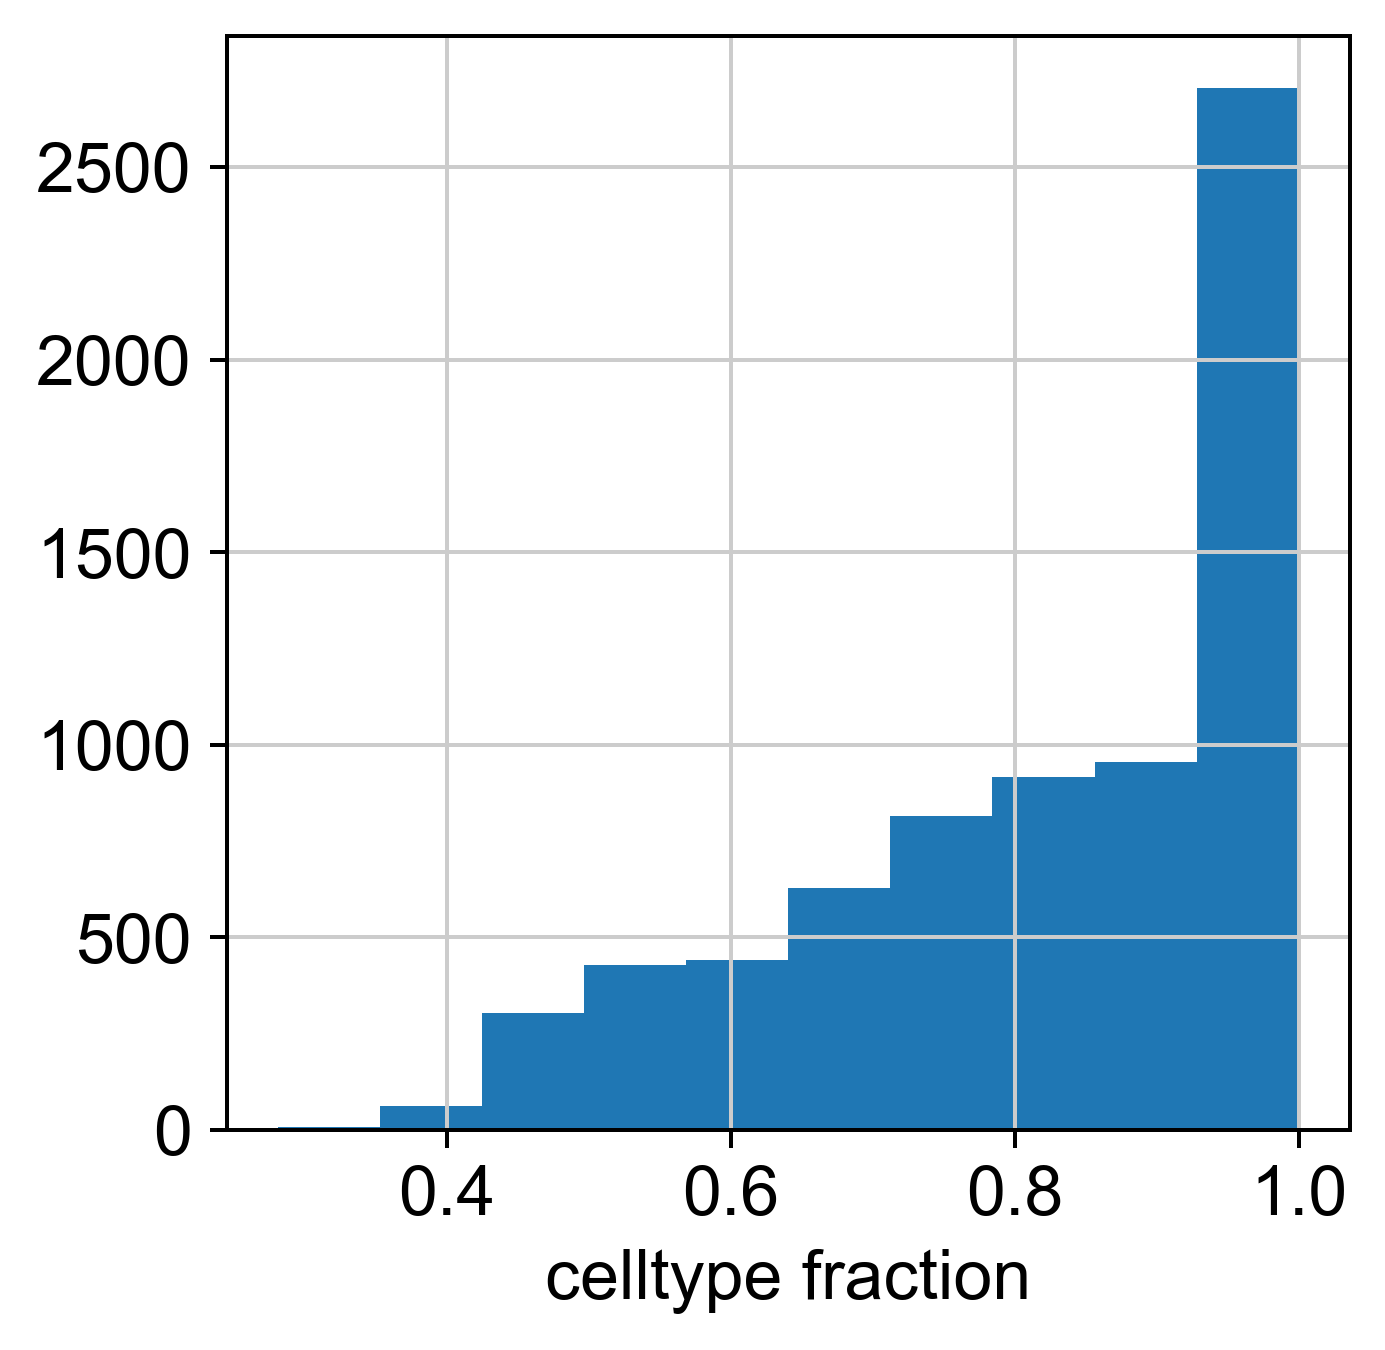

In [9]:
plt.hist(adata.uns['nhood_adata'].obs["nhood_annotation_frac"])
plt.xlabel("celltype fraction")

In [10]:
nhood_annotation = adata.uns['nhood_adata'].obs['nhood_annotation']
nhood_annotation = nhood_annotation.cat.add_categories(['Ambiguous'])
adata.uns['nhood_adata'].obs['nhood_annotation'] = nhood_annotation

adata.uns['nhood_adata'].obs.loc[adata.uns['nhood_adata'].obs["nhood_annotation_frac"] < 0.6, "nhood_annotation"] = "Ambiguous"


/Users/cartalop/mambaforge/envs/milopy/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/cartalop/mambaforge/envs/milopy/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/cartalop/mambaforge/envs/milopy/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/cartalop/mambaforge/envs/milopy/lib/python3.9/site-packages/sea

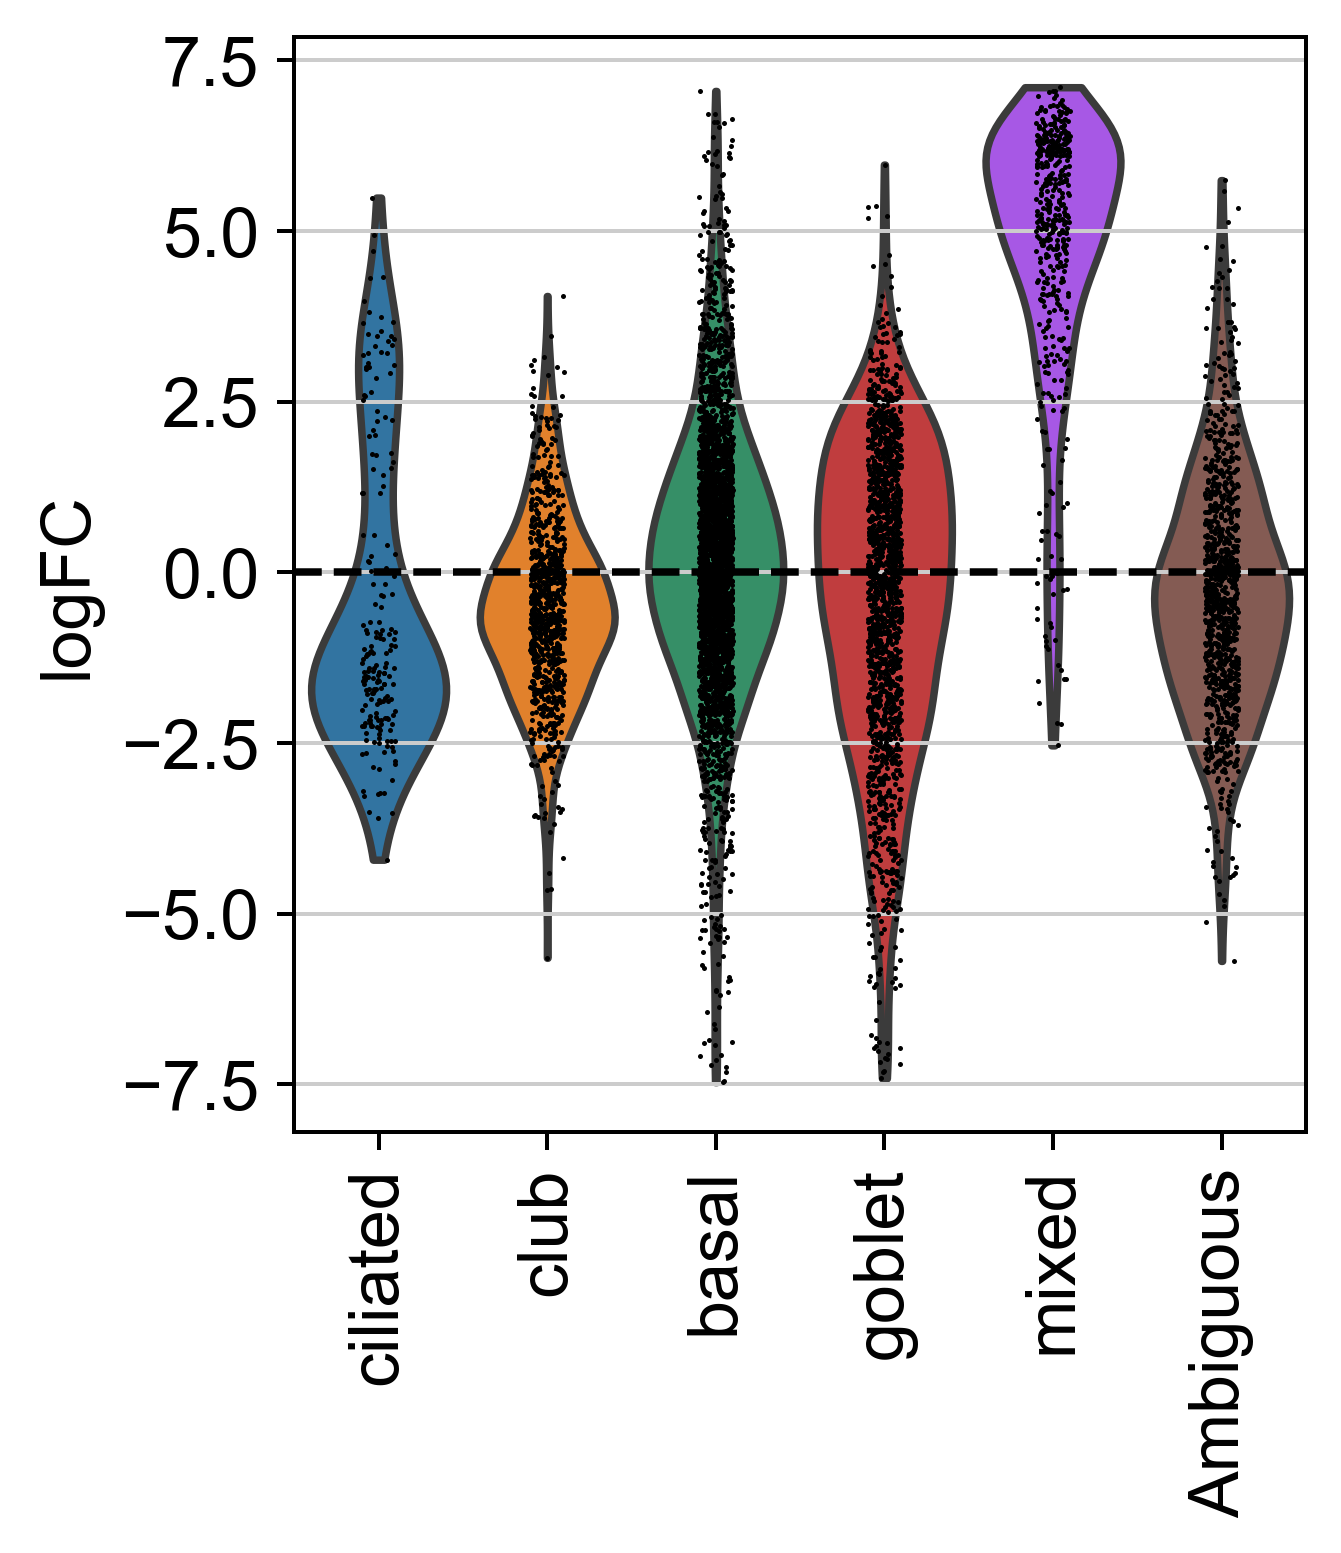

In [11]:
sc.pl.violin(adata.uns['nhood_adata'], "logFC", groupby = "nhood_annotation", rotation = 90, show = False);
plt.axhline(y = 0, color = 'black', linestyle = '--');
plt.show()